<a href="https://colab.research.google.com/github/kalakhushi18/Machine-Learning-Projects/blob/dev/Time_series_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to the dataset:

https://github.com/nachi-hebbar/ARIMA-Temperature_Forecasting/blob/master/MaunaLoaDailyTemps.csv

In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install pmdarima  #use for finding out the order for the ARIMA model (PDQ => AR I MA)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.8 MB/s eta 0:00:00


In [4]:
df = pd.read_csv('/content/sample_data/MaunaLoaDailyTemps.csv', index_col='DATE', parse_dates = True)
df.dropna(inplace = True)
df.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


We are considering the analysis for Average Temperature

<Axes: xlabel='DATE'>

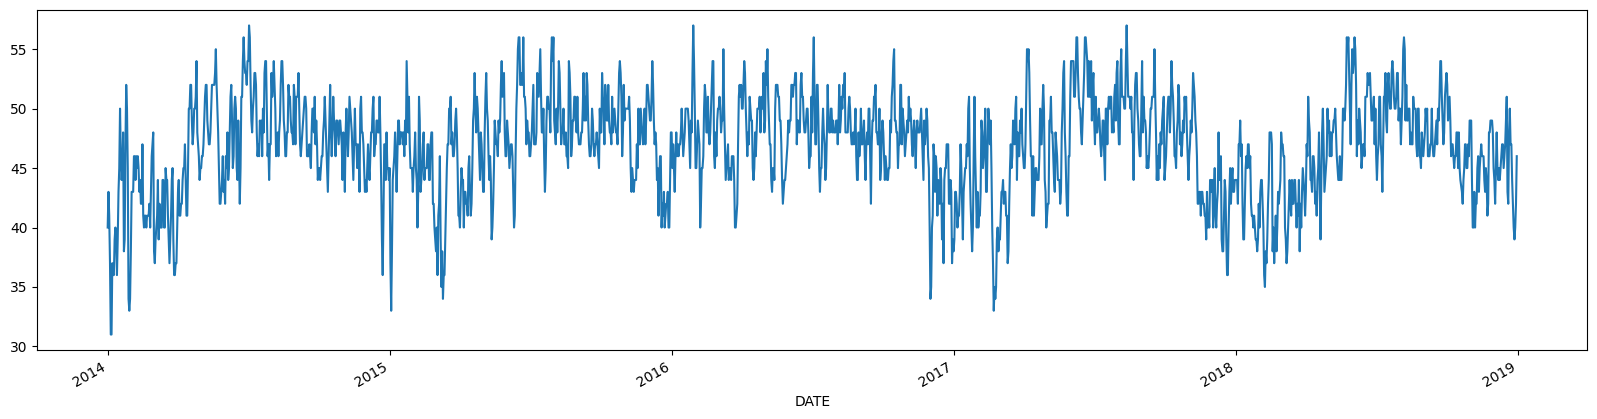

In [6]:
import matplotlib.pyplot as plt
df['AvgTemp'].plot(figsize = (20,5))

Statistical test: ADfuller (augmented Dickey fuller)

In [8]:
from statsmodels.tsa.stattools import adfuller

df_test = adfuller(df['AvgTemp'], autolag = 'AIC')
print("P-value: ", df_test[1])

P-value:  8.675937480199653e-09


Finding order of ARIMA model

In [10]:
from pmdarima import auto_arima


In [11]:
stepwise_fit = auto_arima(df['AvgTemp'], trace=True, suppress_warnings=True)  # goal is to find the order where the AIC score is minimum
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.735, Time=8.84 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=3.79 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=3.13 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.311, Time=7.36 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8318.337, Time=4.48 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.192, Time=3.60 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8310.577, Time=7.00 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.293, Time=4.75 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.620, Time=8.23 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8306.228, Time=4.96 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.517
Date:                Tue, 29 Oct 2024   AIC                           8295.034
Time:                        08:45:36   BIC                           8339.092
Sample:                             0   HQIC                          8311.288
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2070      0.362      3.335      0.001       0.498       1.916
ar.L1          0.9739      0.008    124.621      0.000       0.959       0.989
ma.L1         -0.1246      0.024     -5.256      0.000      -0.171      -0.078
ma.L2         -0.2196      0.024     -9.115      0.000      -0.267      -0.172
ma.L3         -0.2056      0.024     -8.615      0.000      -0.252      -0.159
ma.L4         -0.1373      0.023     -6.034      0.000      -0.182      -0.093
ma.L5         -0.0476      0.024     -1.952      0.051      -0.095       0.000
sigma2         5.4981      0.172     31.952      0.000       5.161       5.835
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                20.20
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Order determined by the auto_arima model is (1,0,5) where 1 is for AR, 0 is for differencing and 5

In [16]:
from statsmodels.tsa.arima.model import ARIMA

Splitting data into Test and train

In [24]:
df.shape

(1821, 5)

In [14]:
train = df.iloc[:-30]  #taking values before 30 values
test = df.iloc[-30:]   #taking last 30 values

print("Training shape: ", train.shape)
print("Test shape: ", test.shape)

Training shape:  (1791, 5)
Test shape:  (30, 5)


Training Model

In [17]:
#decalring model
model = ARIMA(train['AvgTemp'], order = (1,0,5))

#fitting model
model = model.fit()

#summary
model.summary()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4070.198
Date:                Tue, 29 Oct 2024   AIC                           8156.395
Time:                        09:04:45   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                               - 1791                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5856      0.758     61.454      0.000      45.100      48.071
ar.L1          0.9856      0.005    188.230      0.000       0.975       0.996
ma.L1         -0.1412      0.023     -6.124      0.000      -0.186      -0.096
ma.L2         -0.2268      0.024     -9.635      0.000      -0.273      -0.181
ma.L3         -0.2168      0.023     -9.251      0.000      -0.263      -0.171
ma.L4         -0.1479      0.023     -6.491      0.000      -0.193      -0.103
ma.L5         -0.0595      0.024     -2.438      0.015      -0.107      -0.012
sigma2         5.5093      0.174     31.624      0.000       5.168       5.851
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.88
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Make Predictions on Test set

In [22]:
len(test)

30

In [23]:
len(train)

1791

In [19]:
start = len(train)
end = len(train) + len(test) - 1
prediction = model.predict(start= start, end= end, typ= 'levels')
prediction.index = df.index[start:end+1]
prediction


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


,predicted_mean
DATE,
2018-12-01,44.754109
2018-12-02,44.987795
2018-12-03,45.388741
2018-12-04,45.721545
2018-12-05,45.863733
2018-12-06,45.874126
2018-12-07,45.884370
2018-12-08,45.894466
2018-12-09,45.904417


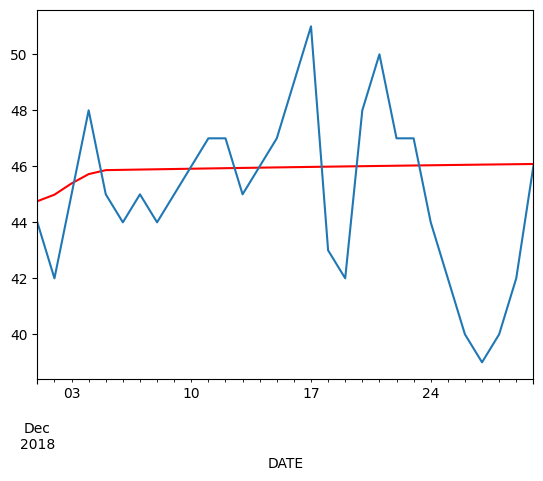

In [20]:
prediction.plot(color= 'red')
test['AvgTemp'].plot()
plt.show()